## Importing the libraries and loading the dataset

In [5]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = 'cleannord.xlsx'  # Replace with your file path
df= pd.read_excel(file_path)

## Checking for Missing Values

In [14]:
# Check for missing values
df.isna().sum()

id                                                                           0
country                                                                      0
vehicle_family_identification_number                                    302880
pool                                                                    185335
manufacturer_name_(eu_standard)                                              0
manufacturer_name_(oem_declaration)                                          0
type_approval_number                                                      4528
type                                                                      4568
variant                                                                  11188
version                                                                  11186
make                                                                         0
commercial_name                                                             29
category_of_the_vehicle_type_approved               

## Correlation Matrix Heatmap

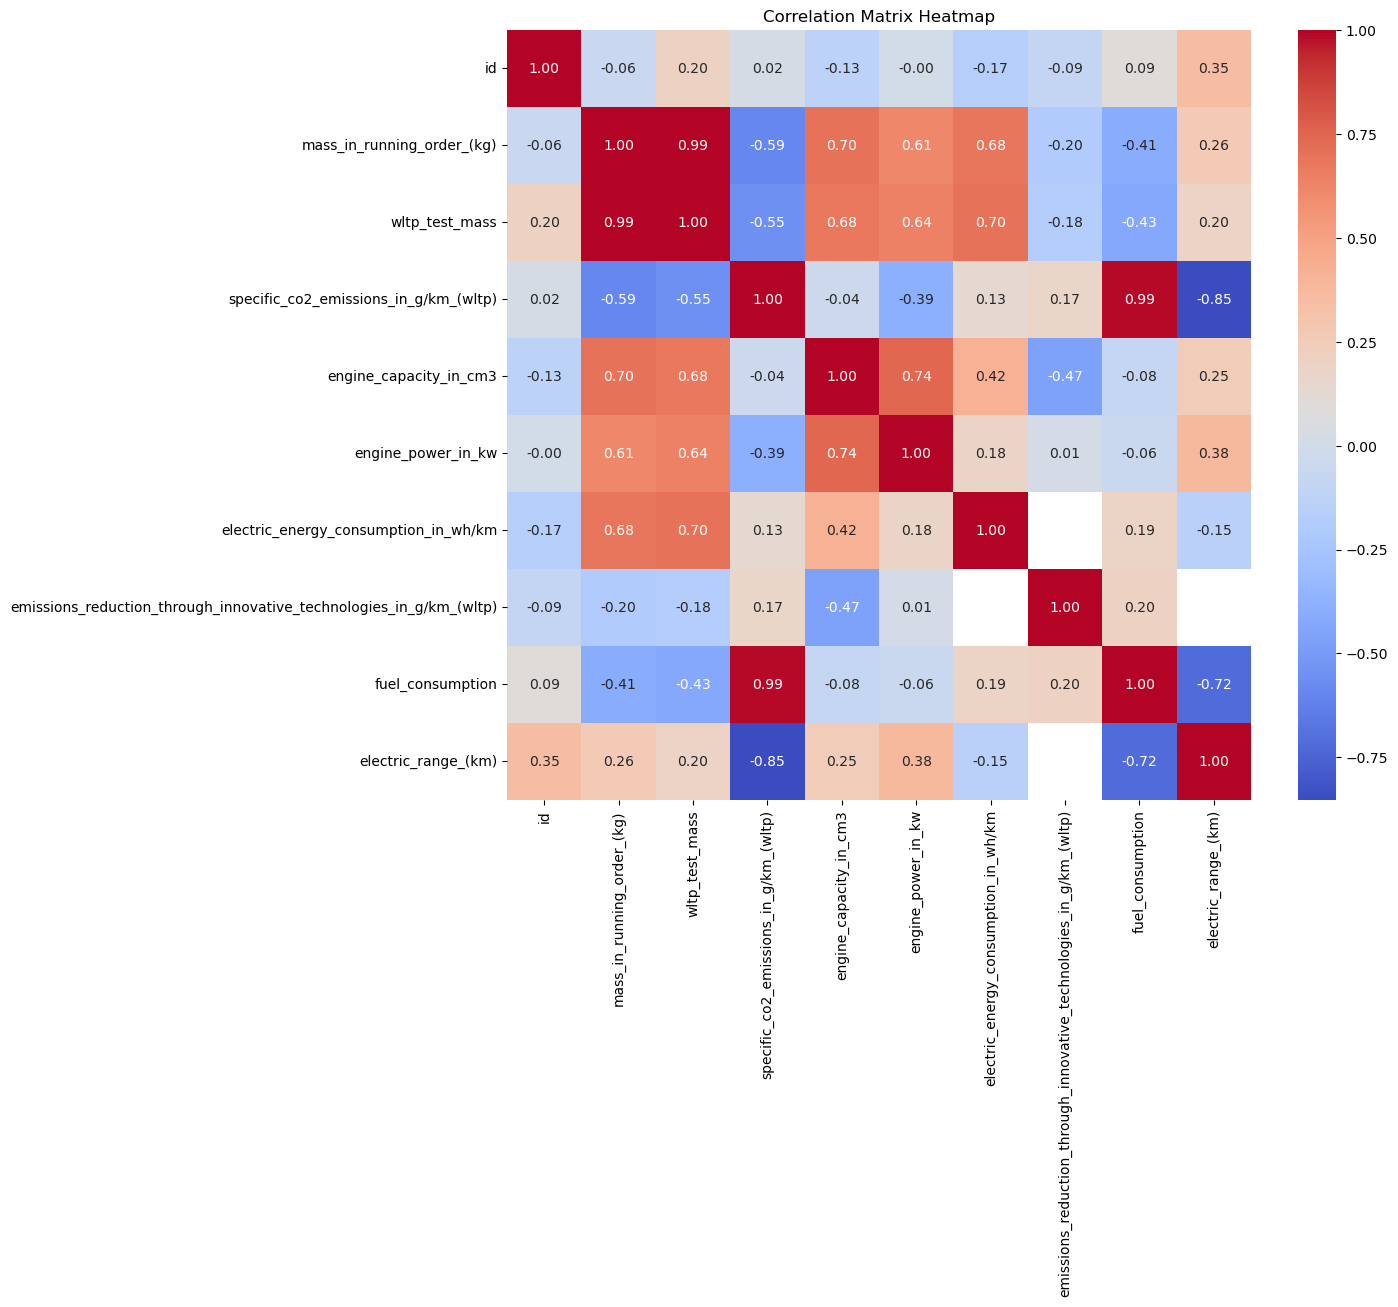

In [6]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Regression Model

In [7]:
# Key predictors and target variable
selected_features = ['fuel_consumption', 'mass_in_running_order_(kg)', 'engine_power_in_kw']

# Drop rows with missing values
regression_data = df[selected_features + ['specific_co2_emissions_in_g/km_(wltp)']].dropna()

# Define X and y
X = regression_data[selected_features]
y = regression_data['specific_co2_emissions_in_g/km_(wltp)']

# Check VIF to address multicollinearity
X_with_constant = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]
print("Variance Inflation Factors:")
print(vif_data)

# Refine features by removing 'mass_in_running_order_(kg)'
refined_features = ['fuel_consumption', 'engine_power_in_kw']
X_refined = regression_data[refined_features]
y_refined = regression_data['specific_co2_emissions_in_g/km_(wltp)']

# Add constant term
X_refined = sm.add_constant(X_refined)

# Build and fit the regression model
refined_model = sm.OLS(y_refined, X_refined).fit()

# Print the model summary
print(refined_model.summary())

Variance Inflation Factors:
                      Feature        VIF
0                       const  47.635739
1            fuel_consumption   1.421586
2  mass_in_running_order_(kg)   3.085888
3          engine_power_in_kw   2.580057
                                      OLS Regression Results                                     
Dep. Variable:     specific_co2_emissions_in_g/km_(wltp)   R-squared:                       0.977
Model:                                               OLS   Adj. R-squared:                  0.977
Method:                                    Least Squares   F-statistic:                 7.998e+06
Date:                                   Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                                           06:04:11   Log-Likelihood:            -1.3431e+06
No. Observations:                                 377325   AIC:                         2.686e+06
Df Residuals:                                     377322   BIC:                  

## Plotting Residuals vs Predicted Values 

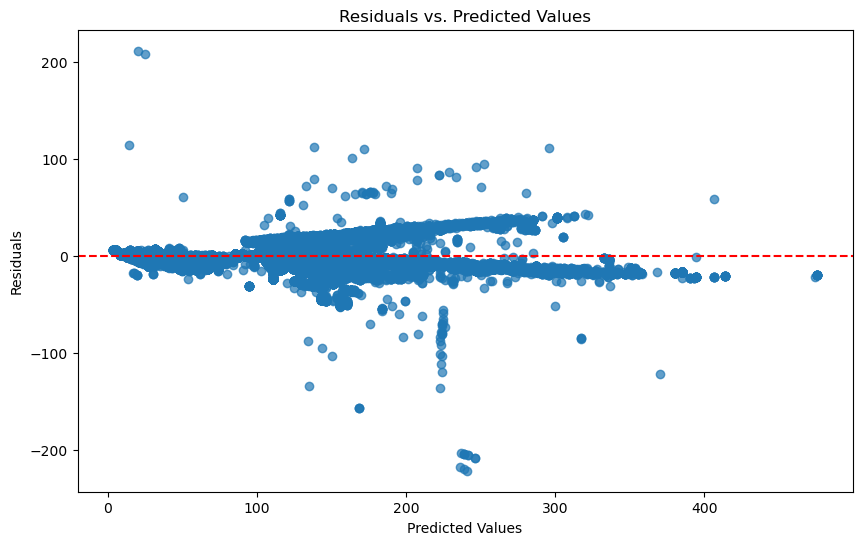

In [8]:
# Visualization 1: Residuals vs Predicted Values
residuals = refined_model.resid
predictions = refined_model.predict(X_refined)

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

## Plotting Actual vs. Predicted Values

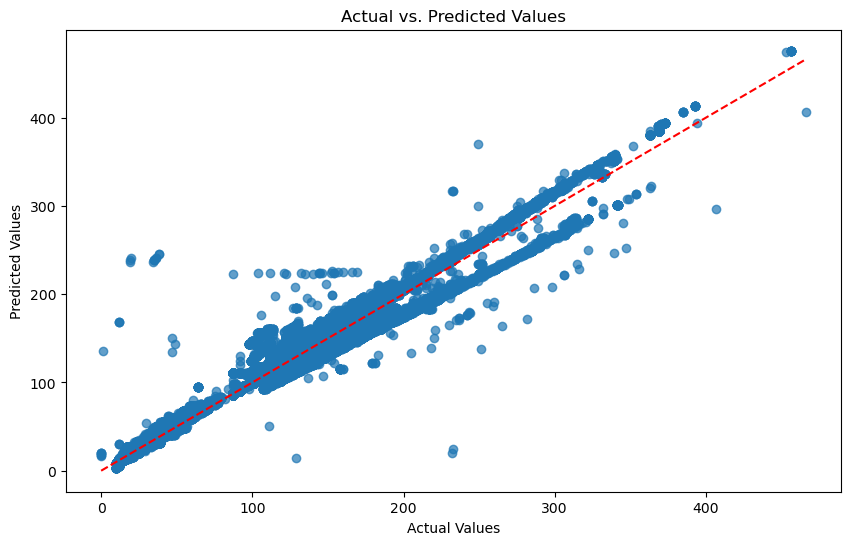

In [9]:
# Visualization 2: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_refined, predictions, alpha=0.7)
plt.plot([y_refined.min(), y_refined.max()], [y_refined.min(), y_refined.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

## Predicting Box Plot for relations between CO2 emission by Fuel Type and Country

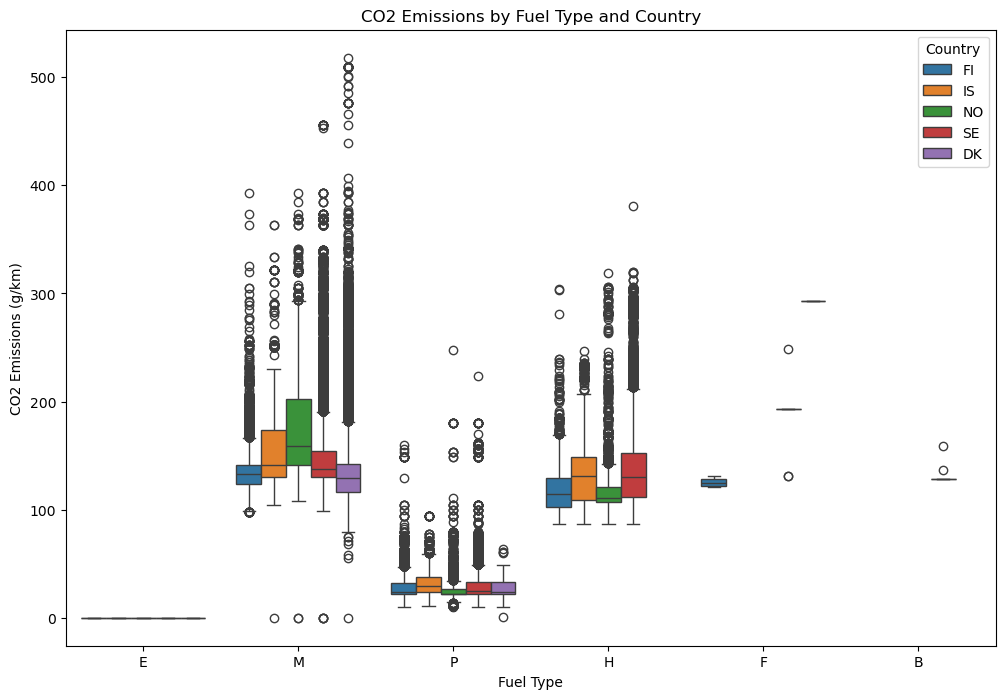

In [10]:
# Visualization 3: CO2 Emissions by Fuel Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='fuel_mode', y='specific_co2_emissions_in_g/km_(wltp)', hue='country')
plt.title("CO2 Emissions by Fuel Type and Country")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend(title="Country")
plt.show()

## Plotting for seeing Distribution of CO2 Emissions

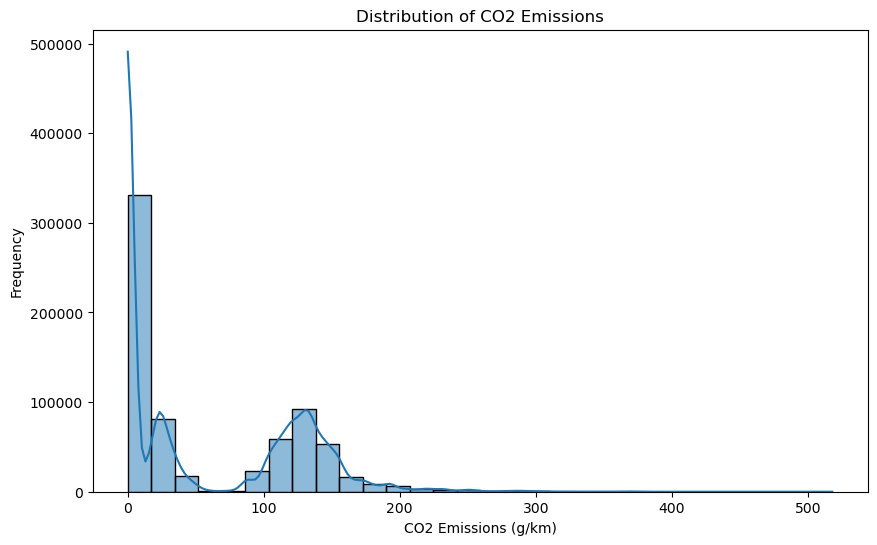

In [11]:
# Visualization 4: Distribution of CO2 Emissions
plt.figure(figsize=(10, 6))
sns.histplot(df['specific_co2_emissions_in_g/km_(wltp)'], kde=True, bins=30)
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.show()

# Pair Plot

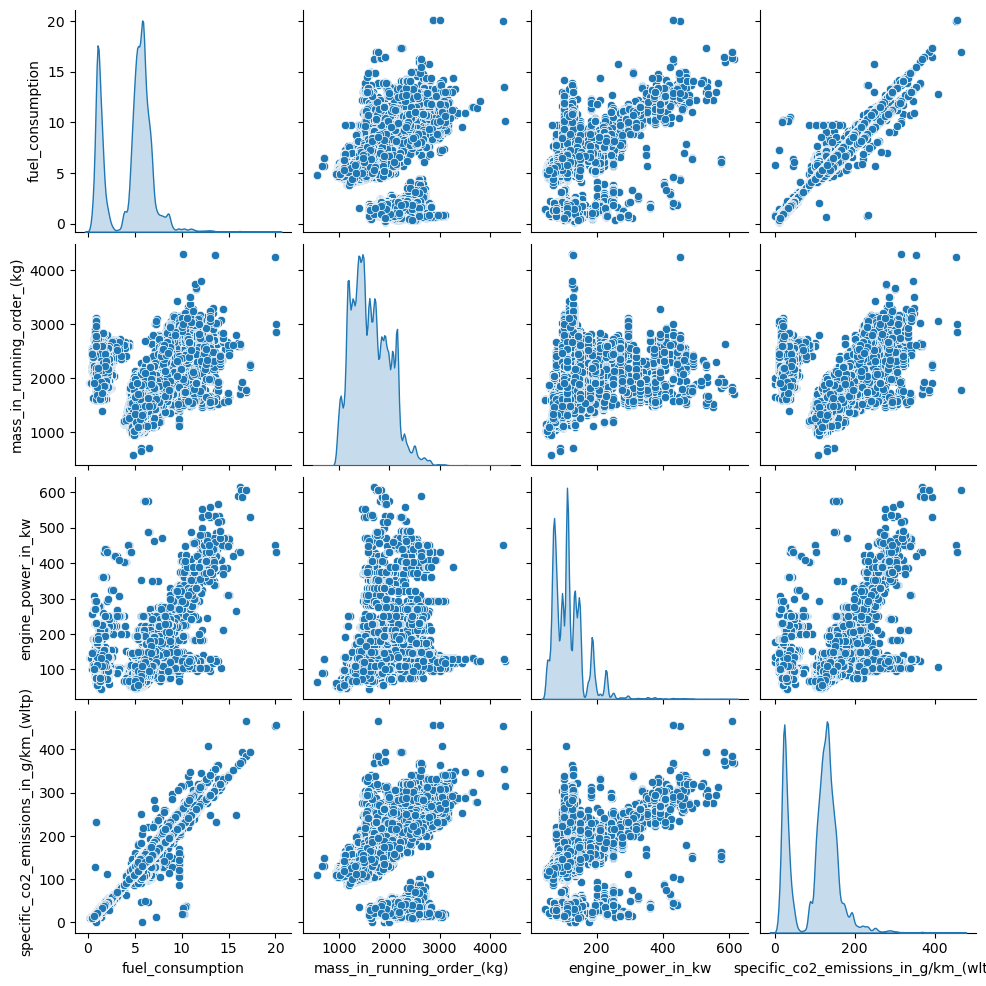

In [12]:
# Visualization 5: Pairplot of Key Features
sns.pairplot(regression_data, diag_kind='kde')
plt.show()

## Information of dataset

In [16]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699569 entries, 0 to 699568
Data columns (total 28 columns):
 #   Column                                                                Non-Null Count   Dtype         
---  ------                                                                --------------   -----         
 0   id                                                                    699569 non-null  int64         
 1   country                                                               699569 non-null  object        
 2   vehicle_family_identification_number                                  396689 non-null  object        
 3   pool                                                                  514234 non-null  object        
 4   manufacturer_name_(eu_standard)                                       699569 non-null  object        
 5   manufacturer_name_(oem_declaration)                                   699569 non-null  object        
 6   type_approval_number        

## Bar Graph for Average CO2 Emissions by Fuel Type

/var/folders/jh/fn1nkpgs4kq752b_tl7f57h00000gn/T/ipykernel_70665/1886735828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_emissions.index, y=fuel_emissions.values, palette="viridis")


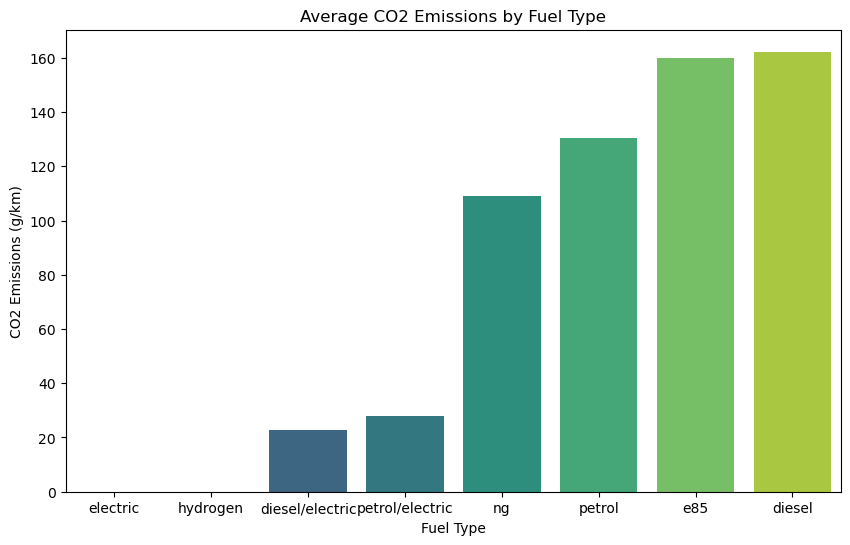

In [20]:
# Step 1: CO2 Emissions by Fuel Types
fuel_emissions = df.groupby('fuel_type')['specific_co2_emissions_in_g/km_(wltp)'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_emissions.index, y=fuel_emissions.values, palette="viridis")
plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()


## Average CO2 Emissions by Manufacturer

/var/folders/jh/fn1nkpgs4kq752b_tl7f57h00000gn/T/ipykernel_70665/1451658216.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_emissions.index, y=manufacturer_emissions.values, palette="mako")


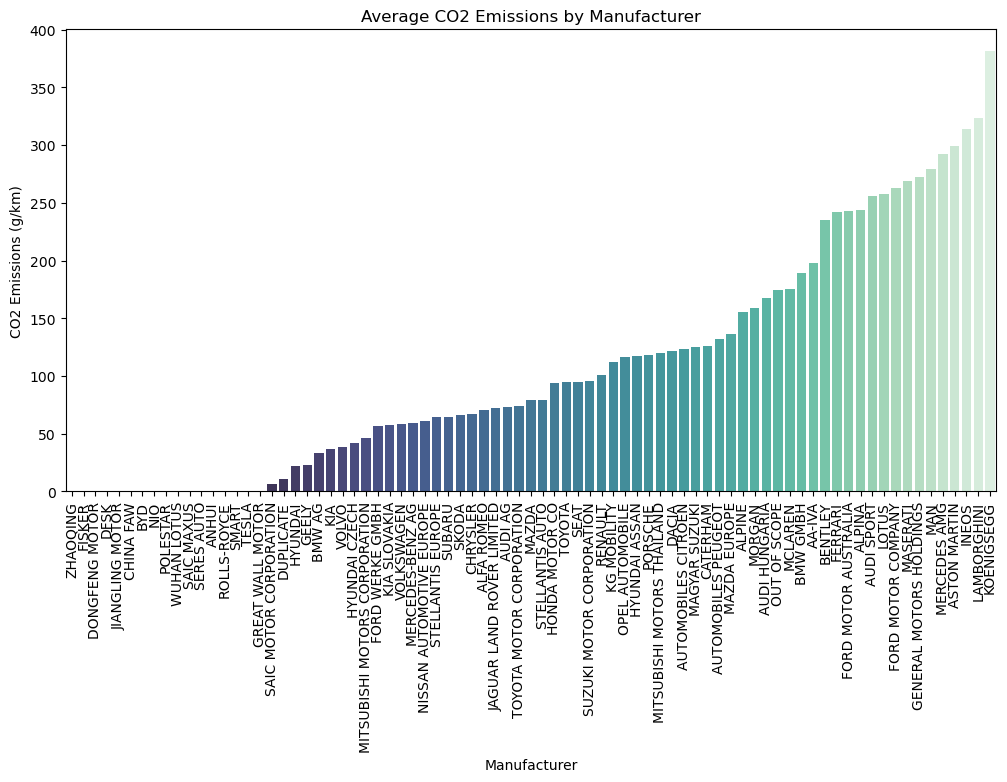

In [21]:
# Step 2: CO2 Emissions by Manufacturer
manufacturer_emissions = df.groupby('manufacturer_name_(eu_standard)')['specific_co2_emissions_in_g/km_(wltp)'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_emissions.index, y=manufacturer_emissions.values, palette="mako")
plt.title("Average CO2 Emissions by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("CO2 Emissions (g/km)")
plt.xticks(rotation=90)
plt.show()

## Bar graph of Average CO2 Emissions by Country

/var/folders/jh/fn1nkpgs4kq752b_tl7f57h00000gn/T/ipykernel_70665/3437459062.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_emissions.index, y=country_emissions.values, palette="cubehelix")


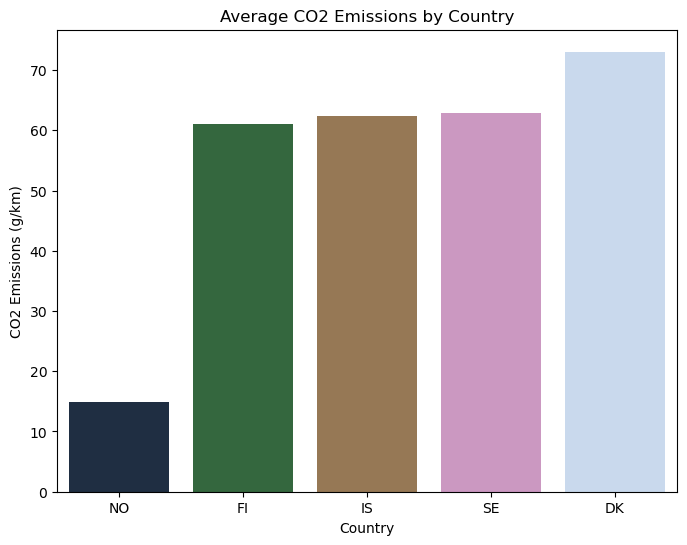

In [22]:
# Step 3: CO2 Emissions by Country
country_emissions = data.groupby('country')['specific_co2_emissions_in_g/km_(wltp)'].mean().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=country_emissions.index, y=country_emissions.values, palette="cubehelix")
plt.title("Average CO2 Emissions by Country")
plt.xlabel("Country")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

# Knowledge Graph

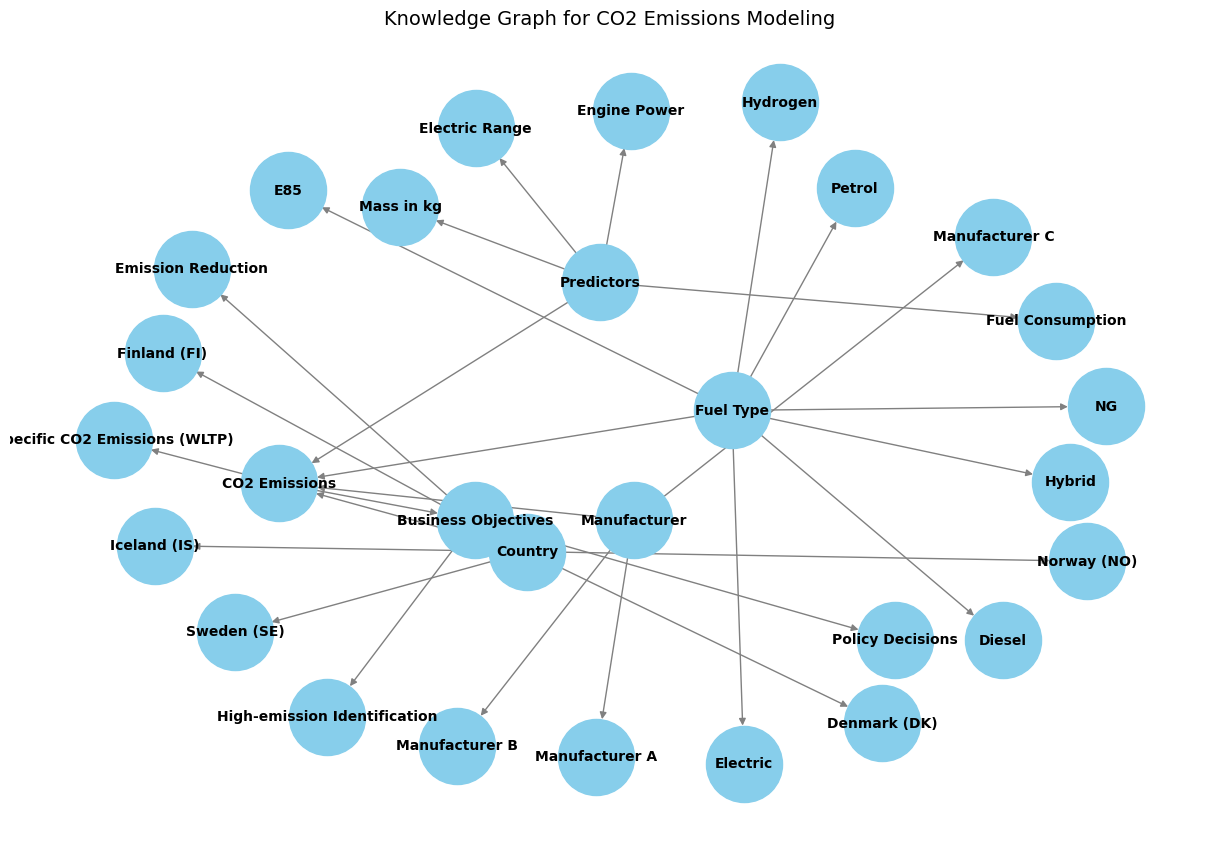

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the nodes and relationships for the knowledge graph
G = nx.DiGraph()

# Add nodes for key categories
categories = ["CO2 Emissions", "Predictors", "Business Objectives", "Fuel Type", "Country", "Manufacturer"]
G.add_nodes_from(categories)

# Add specific nodes under each category
variables = {
    "Fuel Type": ["Diesel", "Petrol", "Electric", "Hybrid", "E85", "NG", "Hydrogen"],
    "Country": ["Denmark (DK)", "Finland (FI)", "Iceland (IS)", "Norway (NO)", "Sweden (SE)"],
    "Manufacturer": ["Manufacturer A", "Manufacturer B", "Manufacturer C"],
    "Predictors": ["Fuel Consumption", "Engine Power", "Mass in kg", "Electric Range"],
    "CO2 Emissions": ["Specific CO2 Emissions (WLTP)"],
    "Business Objectives": ["Emission Reduction", "Policy Decisions", "High-emission Identification"]
}

# Add nodes and relationships to the graph
for category, nodes in variables.items():
    for node in nodes:
        G.add_node(node)
        G.add_edge(category, node)

# Add relationships between categories
G.add_edge("Predictors", "CO2 Emissions")
G.add_edge("Fuel Type", "CO2 Emissions")
G.add_edge("Manufacturer", "CO2 Emissions")
G.add_edge("Country", "CO2 Emissions")
G.add_edge("CO2 Emissions", "Business Objectives")

# Step 2: Draw the knowledge graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # Set layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Knowledge Graph for CO2 Emissions Modeling", fontsize=14)
plt.show()
